# PRS quantitative traits

> **Important notes for this notebook**
>
> ## Learning outcomes
>
> -   Assess whether population stratification influences your
>     association test.
>
> ## How to make this notebook work
>
> -   In this notebook, we will use both `R` and `bash command line`
>     programming languages. Remember to **change the kernel** whenever
>     you transition from one language to the other
>     (`Kernel --> Change Kernel`) indicated by the languages’ images.
>     We will first run `Bash` commands.
>
> <img src="Images/bash.png" alt="Bash" width="80"> Choose the Bash
> kernel

# PRSice analysis for quantitative traits

In this tutorial, we will incorporate covariates and principal
components (PCs) in the polygenic score calculation.

We will be working with a new preprocessed simulated dataset that has
already undergone quality control. Our analysis includes summary
statistics from a powerful base GWAS (in this case, for height) and a
target dataset consisting of European individuals in PLINK format.

Let’s create a folder for the output files.

In [9]:
mkdir -p Results/GWAS7

# Create two links to data and software
ln -sf ../Data
ln -sf ../Software

> **Stop - Read - Solve**
>
> You have already run the PRSice software for binary traits. Now, write
> the command to run it for quantitative traits using the new dataset.
>
> The data: - **height.QC.gz**: post-QC summary statistics -
> **EUR.QC.**: prefix of plink files for the target sample -
> **EUR.covariate**: this file contains the principal components and sex
> as covariates. Since PRSice only accepts a single covariate file, you
> may need to merge the *.cov and *.eigenvec files if you used PLINK for
> quality control.
>
> Please, apply the following filter to the base GWAS: - Filter out SNPs
> with MAF \< 0.01 in the GWAS summary statistics, using information in
> the `MAF` column - Filter out SNPs with INFO \< 0.8 in the GWAS
> summary statistics, using information in the `INFO` column
>
> Check out the user manual for help:
> https://choishingwan.github.io/PRSice/

In [ ]:
# Write your code here

> **Stop - Read - Solve**
>
> Once you have the PRS results, answer the following questions:
>
> -   Which P-value threshold generated the “best-fit” PRS?
> -   How much phenotypic variation does the “best-fit” PRS explain?
>
> Hint: Check the `<PREFIX>.summary` file.

In [ ]:
# Write your answer here

> **Stop - Read - Solve**
>
> Since height differs across sexes, let’s focus on visualizing the
> relationship between the “best-fit” PRS and the phenotype of interest,
> colored according to sex.

In [ ]:
# Write your code for plotting here 

> **Solution 1**
>
> You need to perform the PRS analysis on the simulated dataset in the
> following way:
>
> ``` .bash
> Rscript ./Data/PRSice.R \
>     --prsice ./Software/PRSice \
>     --base ./Data/height.QC.gz \
>     --target ./Data/EUR.QC \
>     --binary-target F \
>     --pheno ./Data/EUR.height \
>     --cov ./Data/EUR.covariate \
>     --base-maf MAF:0.01 \
>     --base-info INFO:0.8 \
>     --stat BETA \
>     --out Results/GWAS7/EUR.PRSice
> ```

> **Solution 2**
>
> -   Best-fit P-value is ~0.4
> -   Phenotypic variation explained by the best-fi model is ~0.16

> **Solution 3**
>
> Code example
>
> ``` .r
> library(ggplot2)
>
> # Read in the files
> prs <- read.table("./Results/GWAS7/EUR.PRSice.best", header=T)
> height <- read.table("./Data/EUR.height", header=T)
> sex <- read.table("./Data/EUR.cov", header=T)
> # Rename the sex
> sex$Sex <- as.factor(sex$Sex)
> levels(sex$Sex) <- c("Male", "Female")
> # Merge the files
> dat <- merge(merge(prs, height), sex)
> # Start plotting
> ggplot(dat, aes(x=SCORE, y=Height, color=Sex))+
>     geom_point()+
>     theme_classic()+
>     labs(x="Polygenic Score", y="Height")
> ```

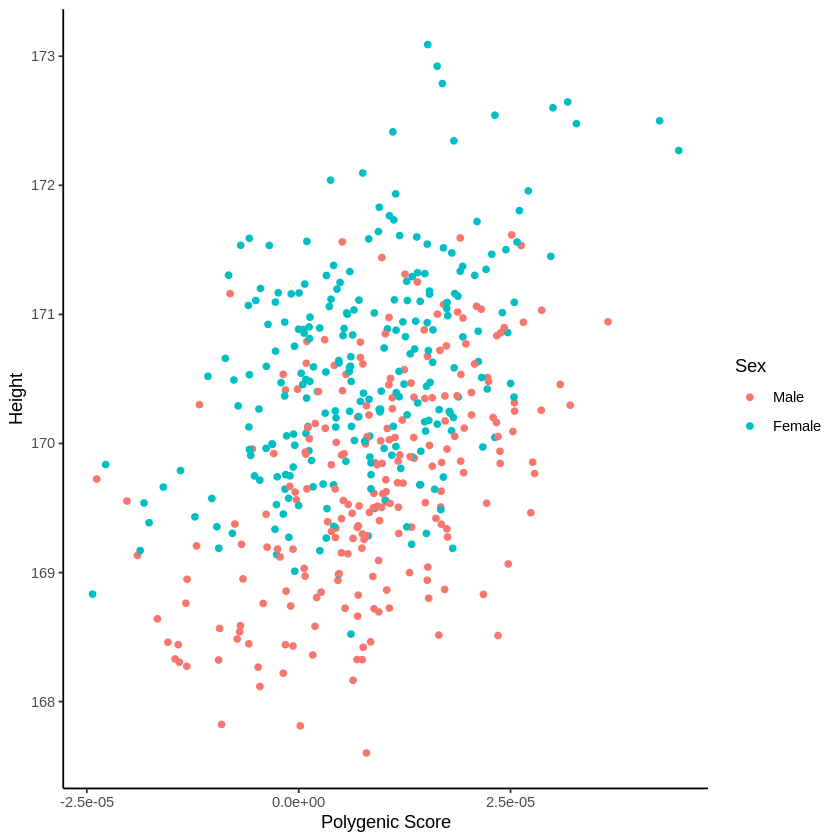

In [9]:
library(ggplot2)

# Read in the files
prs <- read.table("./Results/GWAS7/EUR.PRSice.best", header=T)
height <- read.table("./Data/EUR.height", header=T)
sex <- read.table("./Data/EUR.cov", header=T)
# Rename the sex
sex$Sex <- as.factor(sex$Sex)
levels(sex$Sex) <- c("Male", "Female")
# Merge the files
dat <- merge(merge(prs, height), sex)

# Start plotting
ggplot(dat, aes(x=PRS, y=Height, color=Sex))+
    geom_point()+
    theme_classic()+
    labs(x="Polygenic Score", y="Height")